<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# Canny posts view
[<button class="lm-Widget p-Widget jupyter-widgets jupyter-button widget-button mod-primary">Open in Naas</button>](https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/Canny/Canny_Read.ipynb)

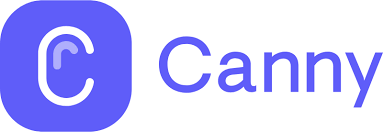

## Enter credentials

In [1]:
canny_api = "**********"   # api key of canny

## Connecting to canny

In [2]:
import requests
import json
import pandas as pd
class canny:
    def __init__(self,api_key):
        self.api_key = api_key

    def read(self):
        canny_api = self.api_key
        response = requests.get("https://canny.io/api/v1/posts/list")
        api_key = {
        "apiKey":canny_api          
        }
        board_id = {
        "id":""                          
        }
        limit = {
        "limit":"100"                          
        }
        data = {**api_key, **board_id, **limit}
        response = requests.post("https://canny.io/api/v1/posts/list",data)
        post_details = response.json()
        pd.set_option('mode.chained_assignment', None)
        dd = post_details['posts']
        df = pd.DataFrame(columns = dd[0].keys()) 
        for i in range(len(dd)):
            df = df.append(dd[i], ignore_index=True)
        df = df.rename(columns={'details': 'POST_DETAIL', 'status': 'STATUS', 'title': 'POST_NAME','board': 'BOARD','category': 'CATEGORY','id': 'BOARD_ID'})        
        board = []
        category = []
        tags = []
        eta = []
        created = []
        for i in range(len(df)):
            board.append(df['BOARD'][i]['name'])
            created.append(df['BOARD'][i]['created'])
            if not df['CATEGORY'][i]:
                category.append('Not assigned')
            else:
                category.append(df['CATEGORY'][i]['name'])    
            if not df['tags'][i]:
                tags.append('Not assigned')
            else:
                tags.append(df['tags'][i][0]['name'])
            if not df['eta'][i]:
                eta.append('Not assigned')
            else:
                eta.append(df['eta'][i])  
        df1 = df[['POST_NAME','POST_DETAIL','STATUS','BOARD_ID']]
        df1['BOARD'] = board
        df1['CREATED'] = created
        df1['ETA'] = eta
        df1['CATEGORY'] = category
        df1['TAGS'] = tags
        return df1

## Post Retrieve

In [3]:
canny(canny_api).read()

,POST_NAME,POST_DETAIL,STATUS,BOARD_ID,BOARD,CREATED,ETA,CATEGORY,TAGS
0,Scheduler : Adapt to the time zone,I would like to manage the time zone of scheduler,under review,5fe377439f49cd19e0ccc9cc,Requests,2020-11-17T11:12:51.981Z,Not assigned,Not assigned,Not assigned
1,Add embed doc,allow all user to see doc from naas launcher,open,5fe20f8eaec9ad63ff081f0c,Requests,2020-11-17T11:12:51.981Z,Not assigned,Not assigned,Not assigned
2,naas_drivers.cityfalcon() is down,Due to the downtime time of city falcon servic...,open,5fe1dc8051be0744615fbece,Incident report,2020-11-17T10:58:37.822Z,Not assigned,Not assigned,Not assigned
3,PDF to MP3,I'm able to convert one text PDF (eBook) to a ...,in progress,5fe06cf5647d5c54c92a2eb5,Requests,2020-11-17T11:12:51.981Z,Not assigned,File_parsing,Awesome-notebooks
4,Convert docx to html,I can convert one docx to html,in progress,5fe06c9bccfb9d4462edbc86,Requests,2020-11-17T11:12:51.981Z,Not assigned,File_parsing,Awesome-notebooks
...,...,...,...,...,...,...,...,...,...
71,Quickbooks - Get invoices list,Get dataframe with list of invoices\nInfo : \n...,under review,5fa98840c7c07151fbd79e58,Requests,2020-11-17T11:12:51.981Z,Not assigned,Not assigned,Not assigned
72,Stripe - Get payments list,Input : \nStripe API Key\nOutput: \nDataframe ...,planned,5fa95ed4f41738229ebc7a6b,Requests,2020-11-17T11:12:51.981Z,February 2020,CRM,Awesome-notebooks
73,Pipedrive - Get contact list,Input : \nPipedrive API Key\nOutput : \nDatafr...,planned,5fa95ea2ef162d23855038b1,Requests,2020-11-17T11:12:51.981Z,March 2020,CRM,Awesome-notebooks
74,Hubspot - Get contact list,Input : \nHubspot API Key\nOutput : \nDatafram...,in progress,5fa95e83f41738229ebc74e1,Requests,2020-11-17T11:12:51.981Z,December 2020,CRM,Not assigned


## Save as csv

In [4]:
canny(canny_api).read().to_csv('naas_canny.csv') 